In [141]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow_probability as tfp
import tensorflow as tf

In [142]:
x=np.linspace(-2,2,100)

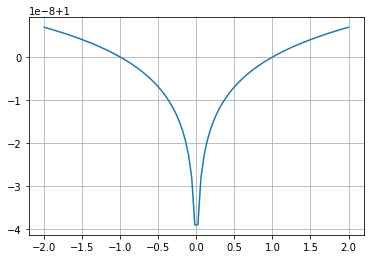

In [143]:
p=0.00000001

y=np.abs(x)**p
plt.plot(x,y)
plt.grid(True)

# Binary Gate

In [144]:
import numpy as np
import matplotlib.pyplot as plt


/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


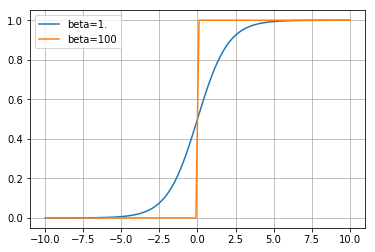

In [145]:
x=np.linspace(-10,10,100)
beta=10000.
y1=1/(1+np.exp(-x))
y2=1/(1+np.exp(-beta*x))

plt.plot(x,y1)
plt.plot(x,y2)
plt.grid(True)
plt.legend(['beta=1.', 'beta=100'])

In [146]:
y2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Skew Normal distribution

In [147]:
from scipy.stats import skewnorm

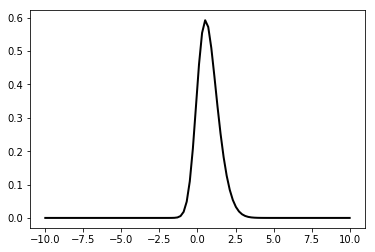

In [148]:
a=2
rv = skewnorm(a,0.,1.)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')


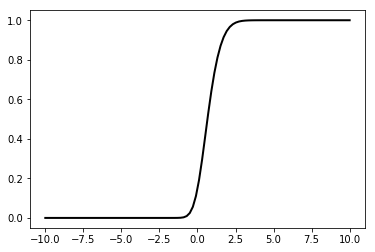

In [149]:
cdf= rv.cdf(x)
plt.plot(x,cdf, 'k-', lw=2, label='frozen pdf')

In [150]:
# Sampling
np.interp(0.00000001,cdf, x)

-2.3158931866717074

# Exponentially modified normal distribution: Scipy

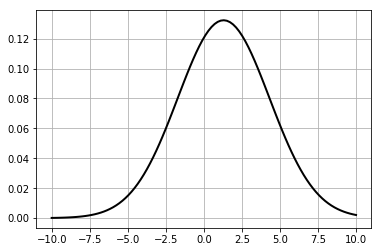

In [151]:
from scipy.stats import exponnorm
k=0.1
rv = exponnorm(k,1.,3.)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.grid(True)

# Exponentially modified normal distribution: Tensorflow

In [159]:
import tensorflow as tf
mu=tf.constant(-3., dtype=tf.float32)
s=tf.constant(1., dtype=tf.float32)

rho=tf.constant(-.1, dtype=tf.float32)
d=tf.exp(rho)


In [160]:
np.exp(-0.1)

0.9048374180359595

In [161]:
sess=tf.Session()

In [162]:
x=tf.linspace(-6., 6., 1000)

In [163]:
def pdf(x, mu, s, d):
    c1=(0.5*d)*tf.exp(0.5*d*(2*mu+d*s**2-2*x))
    c2=1-tf.erf((mu+d*s**2-x)/(s*tf.sqrt(2.)))
    pdf=c1*c2
    return pdf

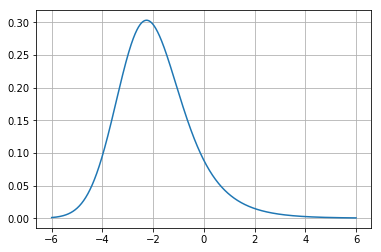

In [164]:
plt.plot(sess.run(x),sess.run(pdf(x,mu,s,d)))
plt.grid(True)

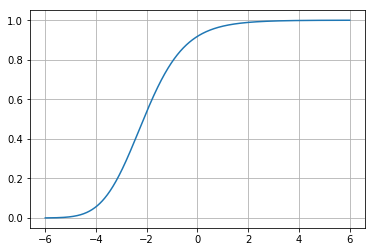

In [124]:
def cdf(x, mu, s, d):   # d>0
    tfd = tfp.distributions

    # Define a single scalar Normal distribution.
    u=d*(x-mu)
    v=d*s
    
    dist1 = tfd.Normal(loc=0., scale=v)
    dist2= tfd.Normal(loc=v**2, scale=v)

    cdf=dist1.cdf(u)-tf.exp((-u+v**2/2+tf.log(dist2.cdf(u))))
    
    return cdf


plt.plot(sess.run(x),sess.run(cdf(x,-3.,1.,1.)))
plt.grid(True)


Text(0.5, 1.0, 'CDF(0) vs  rate of exponential component')

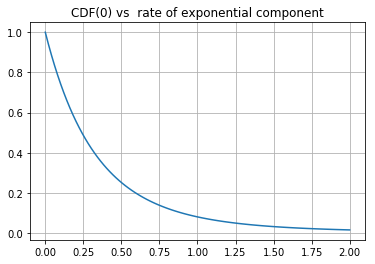

In [125]:
d=tf.linspace(0.00001,2.,100)
plt.plot(sess.run(d),1-sess.run(cdf(0,-3., 1.,d)))
plt.grid(True)
plt.title("CDF(0) vs  rate of exponential component")

In [126]:
def interp(query, xp, yp):
    # Add additional elements at the beginning and end for extrapolation
    xaxis_pad = tf.concat([[tf.minimum(query - 1, xp[0])], xp, [tf.maximum(query + 1, xp[-1])]], axis=0)
    yaxis_pad = tf.concat([yp[:1], yp, yp[-1:]], axis=0)

    # Find the index of the interval containing query
    cmp = tf.cast(query >= xaxis_pad, dtype=tf.int32)
    diff = cmp[1:] - cmp[:-1]
    idx = tf.argmin(diff)

    # Interpolate
    alpha = (query - xaxis_pad[idx]) / (xaxis_pad[idx + 1] - xaxis_pad[idx])
    res = alpha * yaxis_pad[idx + 1] + (1 - alpha) * yaxis_pad[idx]
    return res
 

In [128]:
range(batch)

range(0, 128)

# Sampling

In [139]:
xp=tf.linspace(-6., 6., 1000)
yp=cdf(x,-3.,1.,1.)

temp=yp
yp=xp
xp=temp

batch=1
#query=tf.squeeze(tf.random_uniform(shape=[batch,1200],minval=0., maxval=1., dtype=tf.float32))
query=tf.random_uniform(shape=[batch,1200],minval=0., maxval=1., dtype=tf.float32)

sess=tf.Session()
l=[[]]*batch
for n in range(batch):
    for q in tf.unstack(query[n]):
        l[n].append(interp(q, xp, yp))
    
#sess.run([query,l])

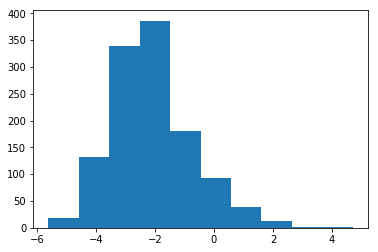

In [63]:
plt.hist(sess.run(l),10)
plt.show()

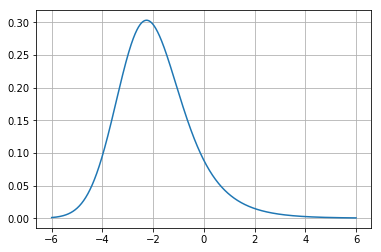

In [64]:
plt.plot(sess.run(x),sess.run(y1*y2))
plt.grid(True)

In [77]:
g=1/(1+np.exp(-beta*np.array(sess.run(l))))
1200-np.count_nonzero(g)

/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


1091